<a href="https://colab.research.google.com/github/Shuyi-Song/HPM881-Lab-rstudio/blob/main/Copy_of_Lecture5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# This file is the lab for HPM 881 Unit 5 -- Interpretation
# Interpretation of racial categories using 3 different approaches:
## 1) unadjusted
## 2) residual direct effect
## 3) IOM approach
## Created: Dec. 1, 2020
## Read in the data

In [ ]:
# Read in the data
library(haven)
lab5 <-read_dta('/content/lecture5_lab.dta')


# 1. Get to know your data

Drop observations with <=0 years of education and with missing/invalid responses to RTHLTH53.

In [ ]:
data <- subset(lab5 , EDUCYR > 0 & RTHLTH53 > 0)


Describe the variables of interest


In [ ]:
summary(data[c("DVTEXP18", "RACEV1X", "AGELAST", "SEX", "INSCOV18", "EDUCYR", "RTHLTH53")])


    DVTEXP18          RACEV1X         AGELAST           SEX       
 Min.   :    0.0   Min.   :1.000   Min.   : 5.00   Min.   :1.000  
 1st Qu.:    0.0   1st Qu.:1.000   1st Qu.:25.00   1st Qu.:1.000  
 Median :    0.0   Median :1.000   Median :43.00   Median :2.000  
 Mean   :  388.6   Mean   :1.522   Mean   :43.26   Mean   :1.526  
 3rd Qu.:  253.0   3rd Qu.:2.000   3rd Qu.:61.00   3rd Qu.:2.000  
 Max.   :81000.0   Max.   :6.000   Max.   :85.00   Max.   :2.000  
    INSCOV18         EDUCYR         RTHLTH53    
 Min.   :1.000   Min.   : 1.00   Min.   :1.000  
 1st Qu.:1.000   1st Qu.:11.00   1st Qu.:1.000  
 Median :1.000   Median :12.00   Median :2.000  
 Mean   :1.466   Mean   :11.95   Mean   :2.308  
 3rd Qu.:2.000   3rd Qu.:15.00   3rd Qu.:3.000  
 Max.   :3.000   Max.   :17.00   Max.   :5.000  

Save the cleaned data

In [ ]:
saveRDS(data, "lecture5_lab.rds")



# 2. Summarize dental expenditures by race categories in RACEV1X.
Using dplyr package


In [ ]:
library(dplyr)

data %>%
  group_by(RACEV1X) %>%
  summarise(mean_DVTEXP18 = mean(DVTEXP18, na.rm = TRUE))



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




RACEV1X,mean_DVTEXP18
<dbl+lbl>,<dbl>
1,414.4850
2,265.4115
3,320.4954
4,415.3884
6,361.6175


# 3. Create a bar graph showing the ratio of mean dental expenditures for each race category in RACEV1X relative to White.
 For example, if mean dental expenditures for White people = $150 and mean dental expenditures for Black people = $100,
the Black/White ratio would = 0.67.

Using ggplot2 package

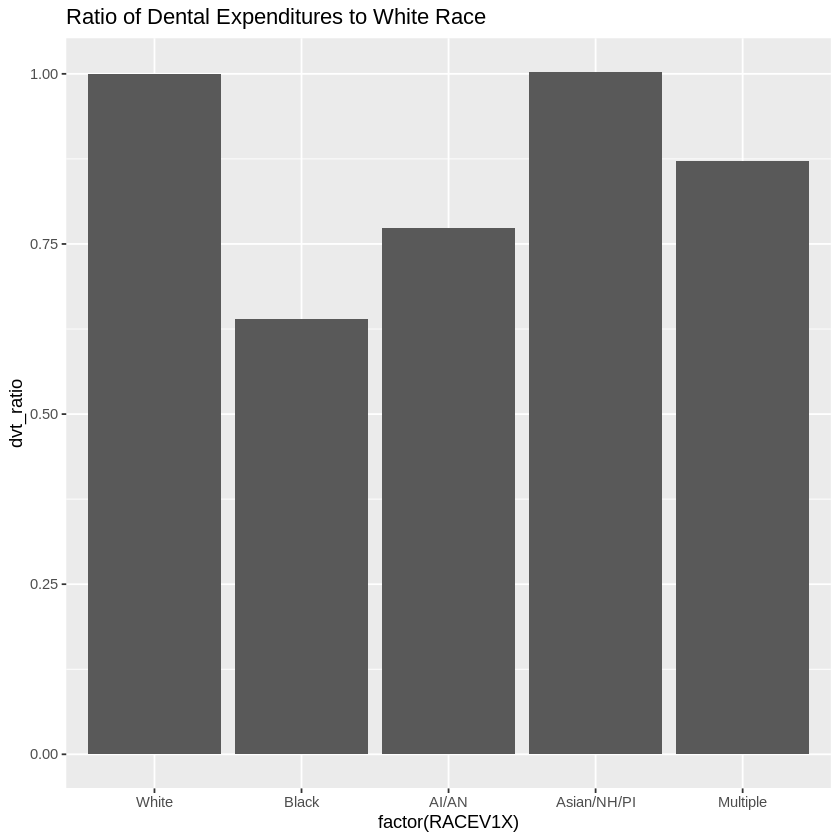

In [ ]:
library(ggplot2)

data %>%
  group_by(RACEV1X) %>%
  summarise(mean_DVTEXP18 = mean(DVTEXP18, na.rm = TRUE)) %>%
  mutate(dvt_ratio = mean_DVTEXP18 / mean_DVTEXP18[RACEV1X == 1]) %>%
  ggplot(aes(x = factor(RACEV1X), y = dvt_ratio)) +
  geom_bar(stat = "identity") +
  labs(title = "Ratio of Dental Expenditures to White Race") +
  scale_x_discrete(labels = c("White", "Black", "AI/AN", "Asian/NH/PI", "Multiple"))


# 4. Unadjusted means approach: Using t-tests, test for differences in mean dental expenditures between each race category in RACEV1X and White.

Loop over values of RACEV1X

In [ ]:
race_categories <- c(2, 3, 4, 6)

for (i in race_categories) {
  cat("T-test for race category", i, "vs White:\n")
  t_test_result <- t.test(DVTEXP18 ~ factor(RACEV1X), data = data, subset = RACEV1X %in% c(1, i))
  print(t_test_result)
}

T-test for race category 2 vs White:

	Welch Two Sample t-test

data:  DVTEXP18 by factor(RACEV1X)
t = 8.1049, df = 7964.9, p-value = 6.063e-16
alternative hypothesis: true difference in means between group 1 and group 2 is not equal to 0
95 percent confidence interval:
 113.0186 185.1284
sample estimates:
mean in group 1 mean in group 2 
       414.4850        265.4115 

T-test for race category 3 vs White:

	Welch Two Sample t-test

data:  DVTEXP18 by factor(RACEV1X)
t = 1.1434, df = 223.49, p-value = 0.2541
alternative hypothesis: true difference in means between group 1 and group 3 is not equal to 0
95 percent confidence interval:
 -67.99809 255.97722
sample estimates:
mean in group 1 mean in group 3 
       414.4850        320.4954 

T-test for race category 4 vs White:

	Welch Two Sample t-test

data:  DVTEXP18 by factor(RACEV1X)
t = -0.024499, df = 1743.6, p-value = 0.9805
alternative hypothesis: true difference in means between group 1 and group 4 is not equal to 0
95 percent c


# 5. Residual direct effect: Regression DVTEXP18 on RACEV1X, AGELAST, EDUCYR, SEX, INSCOV, and RTHLTH53 using White as the reference category.
Interpret any statistically significant differences in the RACEV1X categories. Be precise in your language.

Using lm function



In [ ]:
model <- lm(DVTEXP18 ~ factor(RACEV1X) + AGELAST + EDUCYR + factor(SEX) + factor(INSCOV18) + RTHLTH53, data = data)
summary(model)


Call:
lm(formula = DVTEXP18 ~ factor(RACEV1X) + AGELAST + EDUCYR + 
    factor(SEX) + factor(INSCOV18) + RTHLTH53, data = data)

Residuals:
   Min     1Q Median     3Q    Max 
  -719   -426   -274    -95  80519 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)        442.9994    33.4121  13.259  < 2e-16 ***
factor(RACEV1X)2  -120.9406    22.8718  -5.288 1.25e-07 ***
factor(RACEV1X)3   -28.8140    90.5952  -0.318 0.750448    
factor(RACEV1X)4    -5.8049    35.6765  -0.163 0.870748    
factor(RACEV1X)6   -15.1150    44.3784  -0.341 0.733412    
AGELAST              3.2738     0.4558   7.183 6.99e-13 ***
EDUCYR              -3.0573     2.4142  -1.266 0.205381    
factor(SEX)2        54.7538    16.4320   3.332 0.000863 ***
factor(INSCOV18)2 -196.7244    19.4605 -10.109  < 2e-16 ***
factor(INSCOV18)3 -347.5891    30.8311 -11.274  < 2e-16 ***
RTHLTH53           -34.7775     8.3056  -4.187 2.83e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05


# 6. IOM approach: Which variables would you include in the “Clinical Appropriateness and Need” category?
Which variables would you include in the “Operation of health care systems and legal and regulatory environment” category?
*NOTE: We do not have measures of patient preferences.


In [ ]:

clinical_vars <- c("AGELAST", "SEX", "RTHLTH53")
operation_vars <- c("EDUCYR", "INSCOV")


Clinical appropriateness and need: AGELAST SEX RTHLTH53 Operation: EDUCYR INSCOV18


In [ ]:

clinical_vars <- c("AGELAST", "SEX", "RTHLTH53")
operation_vars <- c("EDUCYR", "INSCOV18")


# 7. Generate predicted dental expenditures for the average White person.

white_mean <- subset(data, RACEV1X == 1) %>%
  summarise_all(mean, na.rm = TRUE)

white_pred <- predict(model, newdata = white_mean)

# 8. For each other race category in RACEV1X, generate predicted dental expenditures for the average person but use the White
# averages for Clinical Appropriateness and Need variables for every racial group.

predictions <- data %>%
  group_by(RACEV1X) %>%
  mutate_at(vars(clinical_vars), ~ white_mean[[.]]) %>%
  summarise(pred_DVTEXP18 = mean(predict(model, newdata = .), na.rm = TRUE))

# 9. Compare differences in predictions between race categories and White using the IOM approach vs the residual direct effect approach.
# Which approach generates larger disparities? For which racial groups?

# Residual direct effect
coef(model)[2]  # Coefficient for factor(RACEV1X) Black

# IOM approach
diff_iom <- white_mean[["RACEV1X"]] - predictions$pred_DVTEXP18[2]
diff_iom
